读取DFT结合能

In [7]:
from wizard.io import read_xyz

dft_coh = {}
frames = read_xyz('DFT-element.xyz')
for atoms in frames:
    dft_coh[atoms.symbols[0]] = atoms.info['energy'] / len(atoms)

计算NEP结合能

In [6]:
from wizard.atoms import SymbolInfo
from wizard.calculator import MaterialCalculator
from calorine.calculators import CPUNEP

calc = CPUNEP('../potentials/6-4-80/nep.txt')

nep_coh = {}
symbol_infos = [
SymbolInfo('Ag', 'fcc', 4.146),
SymbolInfo('Al', 'fcc', 4.042),
SymbolInfo('Au', 'fcc', 4.159),
SymbolInfo('Cu', 'fcc', 3.631),
SymbolInfo('Ni', 'fcc', 3.509),
SymbolInfo('Pb', 'fcc', 5.038),
SymbolInfo('Pd', 'fcc', 3.939),
SymbolInfo('Pt', 'fcc', 3.967),
SymbolInfo('Cr', 'bcc', 2.845),
SymbolInfo('Mo', 'bcc', 3.164),
SymbolInfo('Ta', 'bcc', 3.319),
SymbolInfo('V',  'bcc', 2.997),
SymbolInfo('W',  'bcc', 3.185),
SymbolInfo('Mg', 'hcp', 3.195, 5.186),
SymbolInfo('Ti', 'hcp', 2.931, 4.651),
SymbolInfo('Zr', 'hcp', 3.240, 5.157)
]

for symbol_info in symbol_infos:
    atoms = symbol_info.create_bulk_atoms((1,1,1))
    material_calculator = MaterialCalculator(atoms, calc, symbol_info)
    e, _ = material_calculator.lattice_constant()
    nep_coh[symbol_info.formula] = e

                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 15:49:50      -10.861921        0.0738
BFGSLineSearch:    1[  2] 15:49:50      -10.861988        0.0000
                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 15:49:50      -14.951807        0.0759
BFGSLineSearch:    1[  2] 15:49:50      -14.951899        0.0000
                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 15:49:50      -12.910272        0.2211
BFGSLineSearch:    1[  2] 15:49:50      -12.910673        0.0094
                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 15:49:50      -14.912443        0.0550
BFGSLineSearch:    1[  2] 15:49:50      -14.912478        0.0005
                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 15:49:50      -21.663068        0.0936
BFGSLineSearch:    1[  2] 15:49:50      -21.663147        0.0014
                Step[ FC]

计算EAM结合能

In [2]:
from wizard.atoms import SymbolInfo
from wizard.calculator import MaterialCalculator
from ase.calculators.lammpslib import LAMMPSlib

eam_coh = {}
symbol_infos = [
SymbolInfo('Ag', 'fcc', 4.146),
SymbolInfo('Al', 'fcc', 4.042),
SymbolInfo('Au', 'fcc', 4.159),
SymbolInfo('Cu', 'fcc', 3.631),
SymbolInfo('Ni', 'fcc', 3.509),
SymbolInfo('Pb', 'fcc', 5.038),
SymbolInfo('Pd', 'fcc', 3.939),
SymbolInfo('Pt', 'fcc', 3.967),
SymbolInfo('Cr', 'bcc', 2.845),
SymbolInfo('Mo', 'bcc', 3.164),
SymbolInfo('Ta', 'bcc', 3.319),
SymbolInfo('V',  'bcc', 2.997),
SymbolInfo('W',  'bcc', 3.185),
SymbolInfo('Mg', 'hcp', 3.195, 5.186),
SymbolInfo('Ti', 'hcp', 2.931, 4.651),
SymbolInfo('Zr', 'hcp', 3.240, 5.157)
]

for symbol_info in symbol_infos:
    atoms = symbol_info.create_bulk_atoms((1,1,1))
    cmds = ["pair_style eam/alloy",
            "pair_coeff * * ../potentials/eam/Zhou.eam.alloy " + symbol_info.formula]
    calc = LAMMPSlib(lmpcmds=cmds, log_file='log.txt', keep_alive=True)
    material_calculator = MaterialCalculator(atoms, calc, symbol_info)
    e, _ = material_calculator.lattice_constant()
    eam_coh[symbol_info.formula] = e

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 15:38:08      -11.364178*       1.7042
BFGSLineSearch:    1[  2] 15:38:08      -11.399310*       0.2460
BFGSLineSearch:    2[  3] 15:38:08      -11.399995*       0.0176
BFGSLineSearch:    3[  4] 15:38:08      -11.399999*       0.0001
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 15:38:08      -14.319426*       0.1924
BFGSLineSearch:    1[  2] 15:38:08      -14.320010*       0.0029
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 15:38:09      -15.610656*       3.6679
BFGSLineSearch:    1[  2] 15:38:09      -15.718480*       0.4636
BFGSLineSearch:    2[  3] 15:38:09      -15.720001*       0.0525
BFGSLineSearch:    3[  4] 15:38:09      -15.720020*       0.0006
        

计算NEP与DFT形成能

In [8]:
from wizard.io import read_xyz
from calorine.calculators import CPUNEP

calc = CPUNEP('../potentials/6-4-80/nep.txt')
mp_ternary = read_xyz('mp-ternary.xyz')
DFT_results = []
NEP_results = []
for atoms in mp_ternary:
    atoms.calc = calc
    formation_energies_dft = atoms.info['energy']
    formation_energies_nep = atoms.get_potential_energy()
    for atom in atoms:
        formation_energies_dft -= dft_coh[atom.symbol]
        formation_energies_nep -= nep_coh[atom.symbol]
    DFT_results.append(formation_energies_dft / len(atoms))
    NEP_results.append(formation_energies_nep / len(atoms))    

计算EAM形成能

In [4]:
from wizard.io import read_xyz
from ase.calculators.lammpslib import LAMMPSlib

symbols = ['Ta', 'Pd', 'W', 'Co', 'Pb', 'V', 'Cu', 'Pt', 'Au', 'Al', 'Zr', 'Ni', 'Cr', 'Fe', 'Mg', 'Ag', 'Ti', 'Mo']
mp_ternary = read_xyz('mp-ternary.xyz')
EAM_results = []
for atoms in mp_ternary:
    formula = ""
    for symbol in symbols:
        if symbol in atoms.symbols:
            formula +=  " " + symbol
    cmds = ["pair_style eam/alloy",
            "pair_coeff * * ../potentials/eam/Zhou.eam.alloy" +  formula]
    calc = LAMMPSlib(lmpcmds=cmds, log_file='log.txt', keep_alive=True)
    atoms.calc = calc
    formation_energies_eam = atoms.get_potential_energy()
    for atom in atoms:
        formation_energies_eam -= eam_coh[atom.symbol]
    EAM_results.append(formation_energies_eam / len(atoms))    

画图

NEP Root Mean Squared Error: 0.14819185626630865
NEP Mean Absolute Error: 0.07903646756727245
EAM Root Mean Squared Error: 1.7261838108844039
EAM Mean Absolute Error: 1.2046509294819854


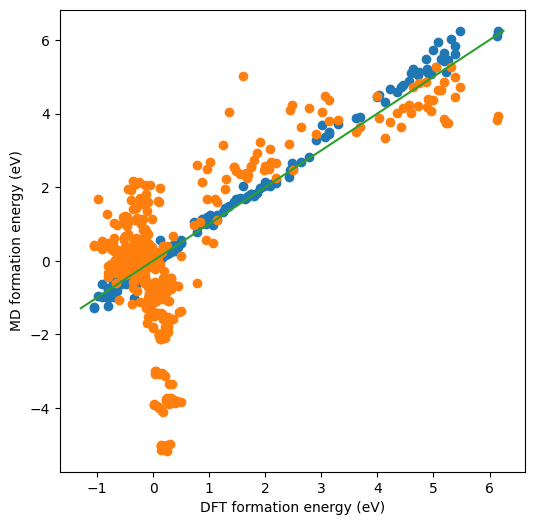

In [9]:
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

%matplotlib inline
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (6, 6)
plt.rcParams.update({"font.size": 10, "text.usetex": False})

ax.set_xlabel('DFT formation energy (eV)')
ax.set_ylabel('MD formation energy (eV)')
ax.plot(DFT_results, NEP_results, 'o', label = 'NEP')
ax.plot(DFT_results, EAM_results, 'o', label = 'EAM')

xmin = min(min(DFT_results), min(NEP_results))  
xmax = max(max(DFT_results), max(NEP_results))

rmse = sqrt(mean_squared_error(DFT_results, NEP_results))
print('NEP Root Mean Squared Error:', rmse)

mae = mean_absolute_error(DFT_results, NEP_results)
print('NEP Mean Absolute Error:', mae)

rmse = sqrt(mean_squared_error(DFT_results, EAM_results))
print('EAM Root Mean Squared Error:', rmse)

mae = mean_absolute_error(DFT_results, EAM_results)
print('EAM Mean Absolute Error:', mae)

ax.plot([xmin, xmax], [xmin, xmax], '-')
plt.show()

计算二元NEP与DFT形成能

In [15]:
from wizard.io import read_xyz
from calorine.calculators import CPUNEP

calc = CPUNEP('../potentials/6-4-80/nep.txt')
mp_ternary = read_xyz('phase/mp-binary.xyz')
DFT_results = []
NEP_results = []
for atoms in mp_ternary:
    atoms.calc = calc
    formation_energies_dft = atoms.info['energy']
    formation_energies_nep = atoms.get_potential_energy()
    for atom in atoms:
        formation_energies_dft -= dft_coh[atom.symbol]
        formation_energies_nep -= nep_coh[atom.symbol]
    DFT_results.append(formation_energies_dft / len(atoms))
    NEP_results.append(formation_energies_nep / len(atoms))    

计算二元EAM形成能

In [16]:
from wizard.io import read_xyz
from ase.calculators.lammpslib import LAMMPSlib

symbols = ['Ta', 'Pd', 'W', 'Co', 'Pb', 'V', 'Cu', 'Pt', 'Au', 'Al', 'Zr', 'Ni', 'Cr', 'Fe', 'Mg', 'Ag', 'Ti', 'Mo']
mp_ternary = read_xyz('phase/mp-binary.xyz')
EAM_results = []
for atoms in mp_ternary:
    formula = ""
    for symbol in symbols:
        if symbol in atoms.symbols:
            formula +=  " " + symbol
    cmds = ["pair_style eam/alloy",
            "pair_coeff * * ../potentials/eam/Zhou.eam.alloy" +  formula]
    calc = LAMMPSlib(lmpcmds=cmds, log_file='log.txt', keep_alive=True)
    atoms.calc = calc
    formation_energies_eam = atoms.get_potential_energy()
    for atom in atoms:
        formation_energies_eam -= eam_coh[atom.symbol]
    EAM_results.append(formation_energies_eam / len(atoms))    

NEP Root Mean Squared Error: 0.03265242395679996
NEP Mean Absolute Error: 0.023776792833880525
EAM Root Mean Squared Error: 1.1100362557553154
EAM Mean Absolute Error: 0.6687563194198247


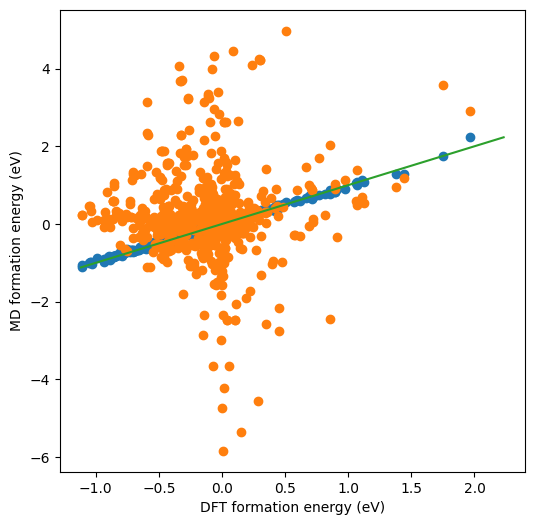

In [17]:
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

%matplotlib inline
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (6, 6)
plt.rcParams.update({"font.size": 10, "text.usetex": False})

ax.set_xlabel('DFT formation energy (eV)')
ax.set_ylabel('MD formation energy (eV)')
ax.plot(DFT_results, NEP_results, 'o', label = 'NEP')
ax.plot(DFT_results, EAM_results, 'o', label = 'EAM')

xmin = min(min(DFT_results), min(NEP_results))  
xmax = max(max(DFT_results), max(NEP_results))

rmse = sqrt(mean_squared_error(DFT_results, NEP_results))
print('NEP Root Mean Squared Error:', rmse)

mae = mean_absolute_error(DFT_results, NEP_results)
print('NEP Mean Absolute Error:', mae)

rmse = sqrt(mean_squared_error(DFT_results, EAM_results))
print('EAM Root Mean Squared Error:', rmse)

mae = mean_absolute_error(DFT_results, EAM_results)
print('EAM Mean Absolute Error:', mae)

ax.plot([xmin, xmax], [xmin, xmax], '-')
plt.show()